In [1]:
# Step 1: Install the necessary libraries
!pip install transformers
!pip install torch torchvision
!pip install pillow

In [2]:
  # Step 2: Import the necessary modules
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# Step 3: Create an object detection pipeline
object_detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [33]:
# Step 4: Define the image you want to detect objects in
image_url = "https://easy-peasy.ai/cdn-cgi/image/quality=80,format=auto,width=700/https://fdczvxmwwjwpwbeeqcth.supabase.co/storage/v1/object/public/images/a8bf1a2c-259e-4e95-b2c2-bb995876ed63/a252bcd6-9a10-40be-bf99-1d850d2026e4.png"
image = Image.open(requests.get(image_url, stream=True).raw)

In [34]:
# Step 5: Perform object detection
results = object_detector(image)

(-0.5, 699.5, 699.5, -0.5)

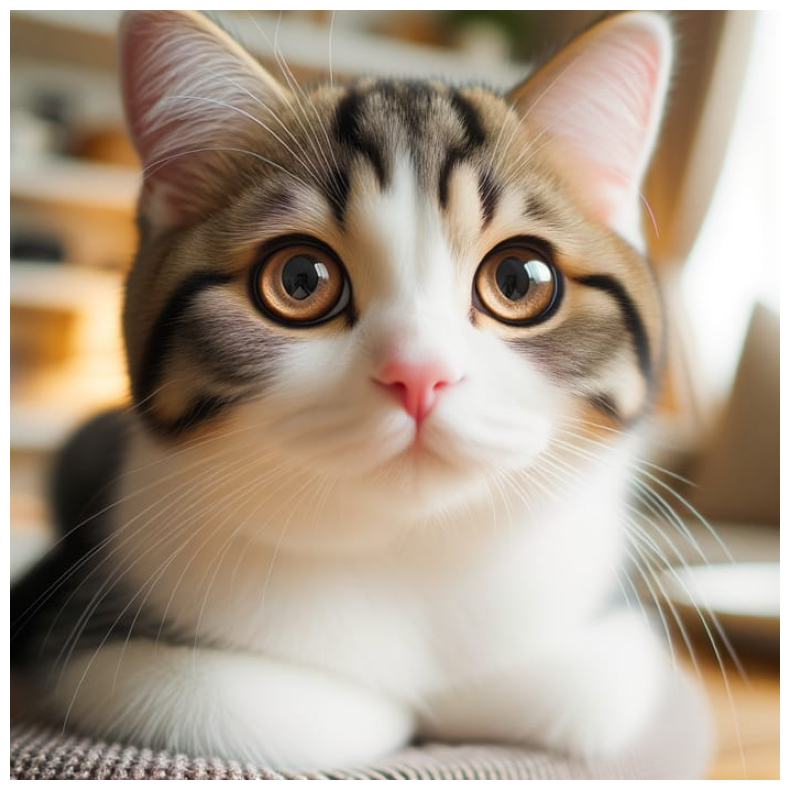

In [35]:
# Step 6: Display the detection results
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

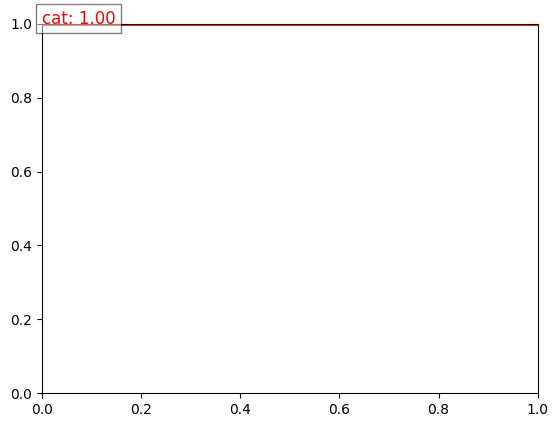

In [36]:
# Create a Rectangle patch for each detected object
ax = plt.gca()
for result in results:
    box = result['box']
    label = result['label']
    score = result['score']

    # Draw the bounding box
    rect = patches.Rectangle((box['xmin'], box['ymin']), box['xmax'] - box['xmin'], box['ymax'] - box['ymin'],
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add the label and score
    plt.text(box['xmin'], box['ymin'], f"{label}: {score:.2f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()